# Policy runtimes

In this notebook, we plot the runtimes of various heterogeneity-aware policies.

## Import statements

In [1]:
from plotting_utils import *

## Helper method to process file with results

In [2]:
def parse_logs(logfile):
    data = {
        'policy': [],
        'num_jobs': [],
        'runtimes': []
    }    
    policy_to_label = {
        'max_min_fairness_perf': 'Gavel',
        'max_min_fairness_packed': 'Gavel w/ SS',
        'max_min_fairness_water_filling_perf': 'Gavel',
        'max_min_fairness_water_filling_packed': 'Gavel (SS)',
    }
    import csv
    with open(logfile, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            policy = row['Policy']
            if "_perf" in policy or "_packed" in policy:
                num_jobs = int(row['# Jobs'])
                runtimes = []
                for i in range(1, 4):
                    data['policy'].append(policy_to_label[policy])
                    data['num_jobs'].append(num_jobs)
                    data['runtimes'].append(float(row['Trial %d' % (i)]))
    return data

## Plotting functions

In [3]:
import pylab
def plot_legend(data,
                output_filename=None):
    fig = pylab.figure()
    figlegend = pylab.figure(figsize=(5, 0.5))
    ax = fig.add_subplot(111)

    sns.lineplot(x='num_jobs', y='runtimes', style='policy',
                         hue='policy',
                         data=data, ci=None,
                         markers=True, ax=ax)
    lines = ax.lines
    figlegend.legend(
        lines,
        ["Gavel", "Gavel w/ SS"],
        loc='center',
        frameon=False,
        ncol=2,
        columnspacing=None,
        labelspacing=None)
    
    if output_filename is not None:
        figlegend.savefig(output_filename)

In [4]:
def plot_data(data, legend_loc='best',
              output_filename=None):
    plt.figure(figsize=(4.5, 3))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    sns.lineplot(x='num_jobs', y='runtimes', style='policy',
                 hue='policy',
                 data=data, ci=None,
                 markers=True,
                 legend=False)
    ax.set_xlabel("Number of jobs")
    ax.set_ylabel("Seconds")
    ax.set_xscale('log', basex=2)
    ax.set_yscale('log', basey=2)
    ax.set_xticks([32, 128, 512, 2048])
    ax.set_xticklabels([32, 128, 512, 2048])
    ax.set_xlim([32, 4096])
    ax.set_yticks([0.125, 1, 8, 64, 512])
    ax.set_yticklabels([0.125, 1, 8, 64, 512])
    ax.set_ylim([0.015625, 512])
    sns.despine()
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')

## Plot policy runtimes vs. number of jobs

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


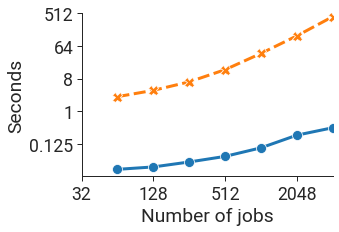

In [5]:
single_gpu_data = parse_logs('/future/u/deepakn/gavel/solver_scaling/single_gpu.csv')
plot_data(single_gpu_data)

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


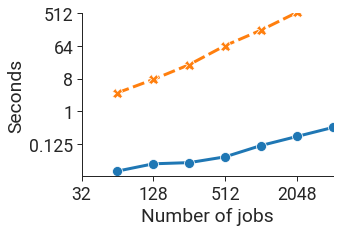

In [6]:
multi_gpu_data_with_job_type_throughputs = \
    parse_logs('/future/u/deepakn/gavel/solver_scaling/multi_gpu_job_type_throughputs.csv')
plot_data(multi_gpu_data_with_job_type_throughputs,
          output_filename="solver_scaling/multi_gpu_las_v100=36_p100=36_k80=36.pdf")

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


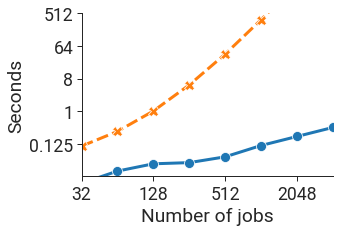

In [7]:
multi_gpu_data_with_job_throughputs = \
    parse_logs('/future/u/deepakn/gavel/solver_scaling/multi_gpu.csv')
plot_data(multi_gpu_data_with_job_throughputs,
          output_filename="solver_scaling/multi_gpu_las_v100=36_p100=36_k80=36.pdf")

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


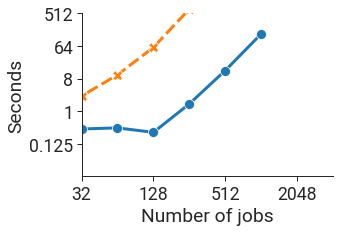

In [8]:
single_gpu_water_filling_throughputs = \
    parse_logs('/future/u/deepakn/gavel/solver_scaling/single_gpu_water_filling.csv')
plot_data(single_gpu_water_filling_throughputs,
          output_filename="solver_scaling/single_gpu_las_water_filling_v100=36_p100=36_k80=36.pdf")

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


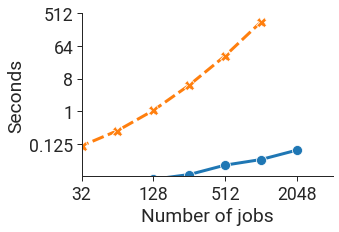

In [9]:
las_throughputs = \
    parse_logs('/future/u/deepakn/gavel/solver_scaling/las.csv')
plot_data(las_throughputs,
          output_filename="solver_scaling/multi_gpu_las.pdf")

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


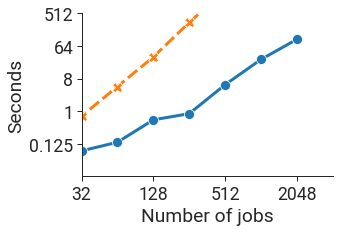

In [10]:
hierarchical_throughputs = \
    parse_logs('/future/u/deepakn/gavel/solver_scaling/hierarchical.csv')
plot_data(hierarchical_throughputs,
          output_filename="solver_scaling/multi_gpu_hierarchical.pdf")

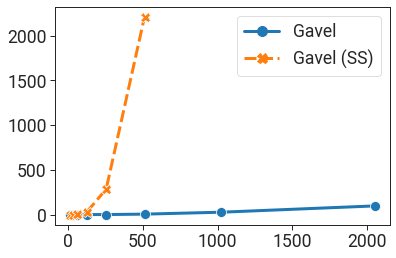

<Figure size 360x36 with 0 Axes>

In [11]:
plot_legend(hierarchical_throughputs,
            output_filename="solver_scaling/legend.pdf")